<a href="https://colab.research.google.com/github/suraj4502/Python_code/blob/main/Multi_Linear_Regression_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
#Read the data
cars = pd.read_csv("/content/Toyoto_Corrola.csv")
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [ ]:
cars.drop(['Id','Model'],inplace=True,axis=1)

In [ ]:
cars.drop('Cylinders',inplace=True,axis=1)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Gears      1436 non-null   int64
 6   Weight     1436 non-null   int64
dtypes: int64(7)
memory usage: 78.7 KB


In [ ]:
#check for missing values
cars.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Gears        0
Weight       0
dtype: int64

# Correlation Matrix

In [ ]:
cor=cars.corr()

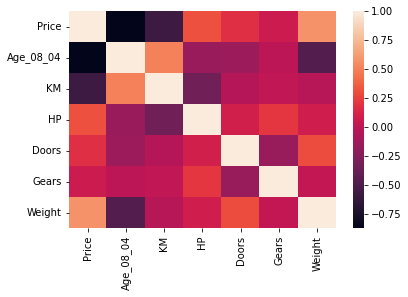

In [ ]:
sns.heatmap(cor)

# Scatterplot between variables along with histograms

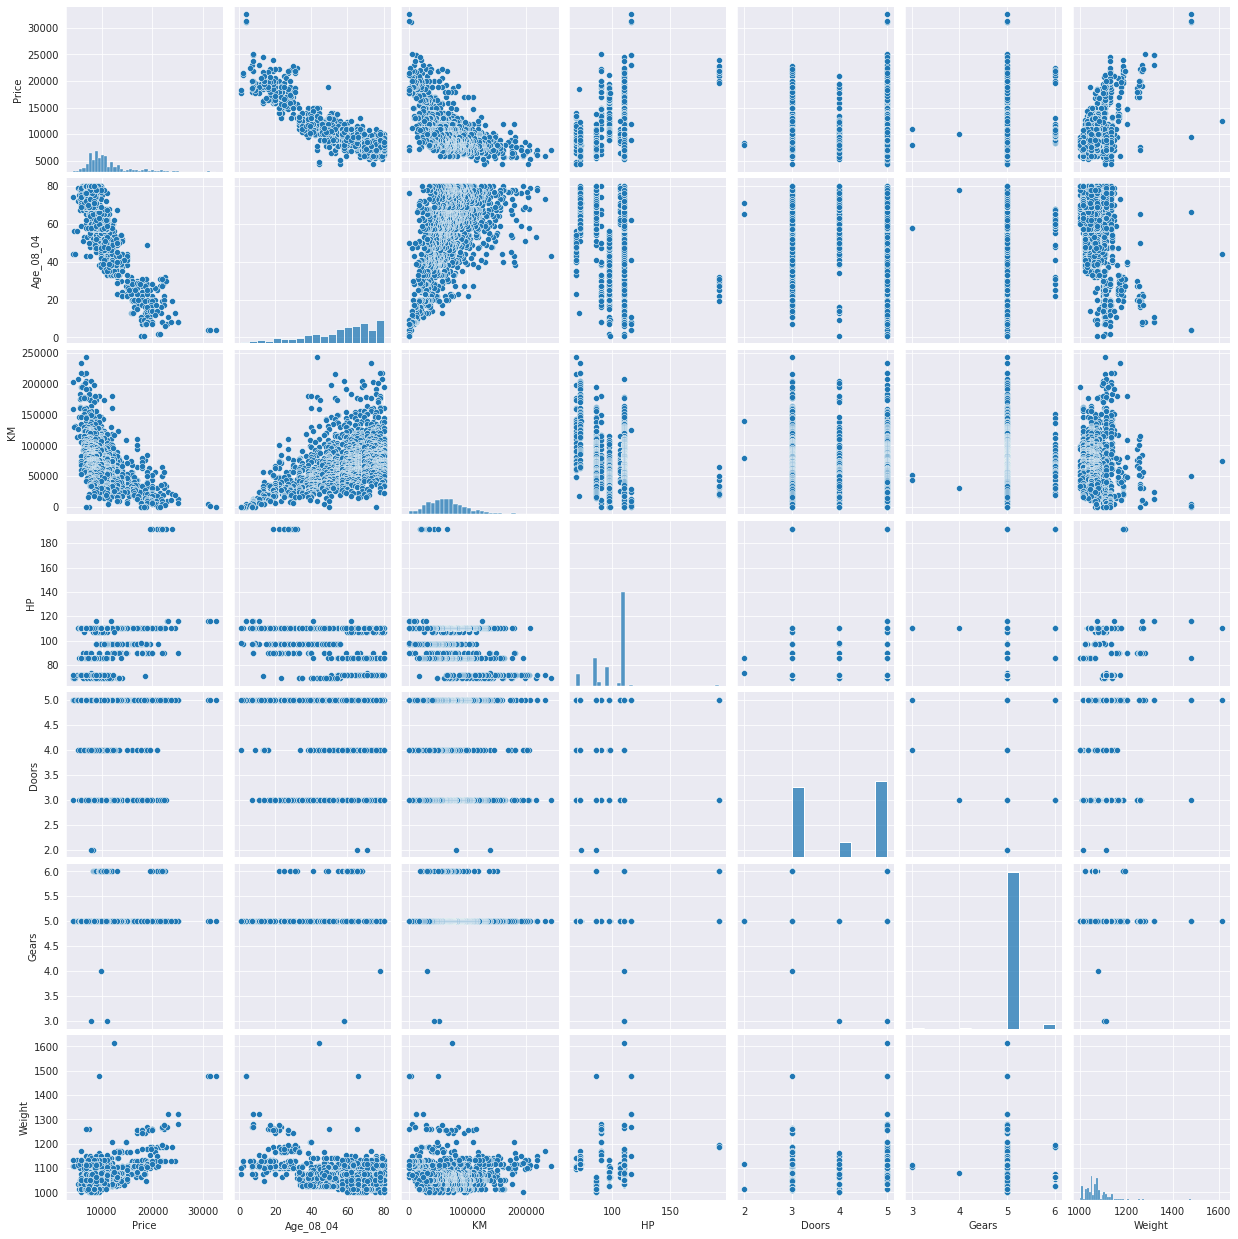

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [ ]:
cars.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [ ]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data=cars).fit()

In [ ]:
#Coefficients
model.params

Intercept   -6984.373566
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

# Simple Linear Regression Models

In [ ]:
ml_v=smf.ols('Price~Age_08_04',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [ ]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

PatsyError: ignored

In [ ]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

# Calculating VIF

In [ ]:
cars.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [ ]:
rsq_AGE = smf.ols('Age_08_04~KM+HP+Doors+Gears+Weight',data=cars).fit().rsquared  
vif_AGE = 1/(1-rsq_AGE) # 16.33

rsq_KM = smf.ols('KM~Age_08_04+HP+Doors+Gears+Weight',data=cars).fit().rsquared  
vif_KM = 1/(1-rsq_KM) # 16.33

rsq_HP= smf.ols('HP~Age_08_04+KM+Doors+Gears+Weight',data=cars).fit().rsquared  
vif_HP = 1/(1-rsq_HP)# 16.33

rsq_Doors= smf.ols('Doors~Age_08_04+KM+HP+Gears+Weight',data=cars).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) # 16.33

rsq_Gears= smf.ols('Gears~Age_08_04+KM+HP+Doors+Weight',data=cars).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_Weight= smf.ols('Weight~Age_08_04+KM+HP+Doors+Gears',data=cars).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 


# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Doors','Gears','Weight'],'VIF':[vif_AGE,vif_KM,vif_HP,vif_Doors,vif_Gears,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Gears,1.096501
5,Weight,1.508041


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

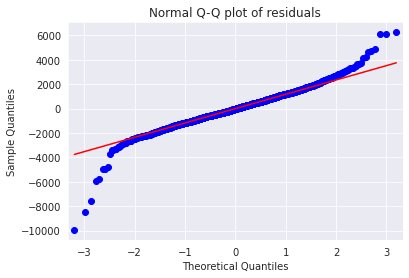

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>4500))

[array([109, 110, 111, 147, 171, 523])]

## Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

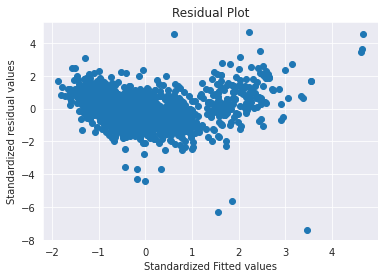

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

In [ ]:
cars.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


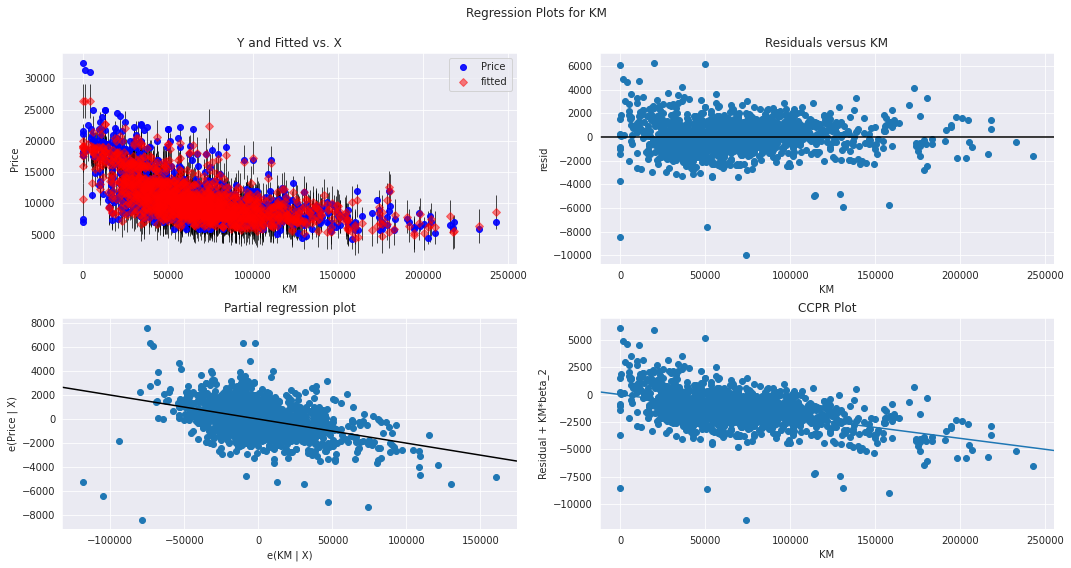

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

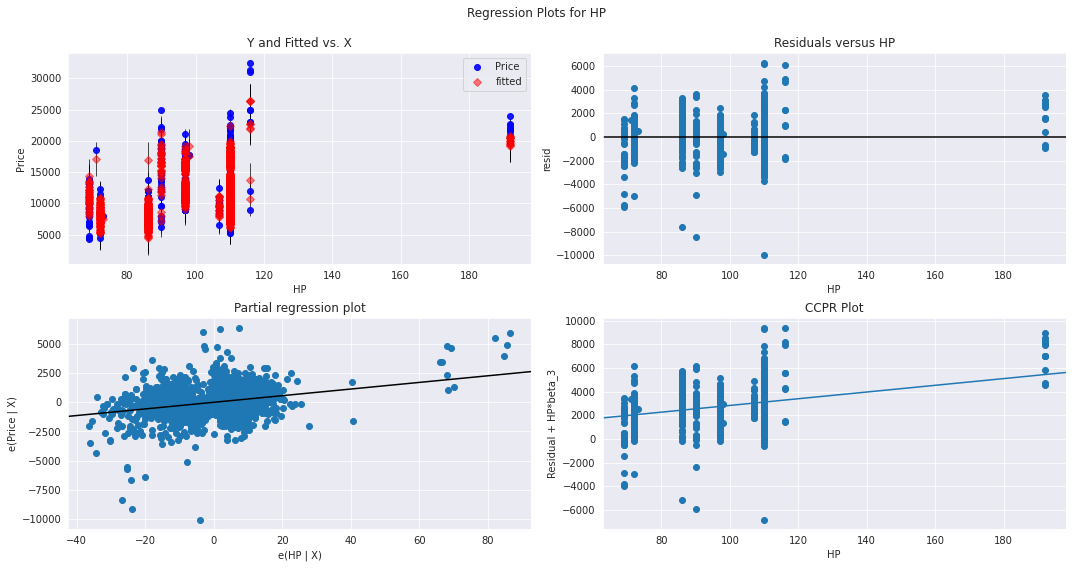

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

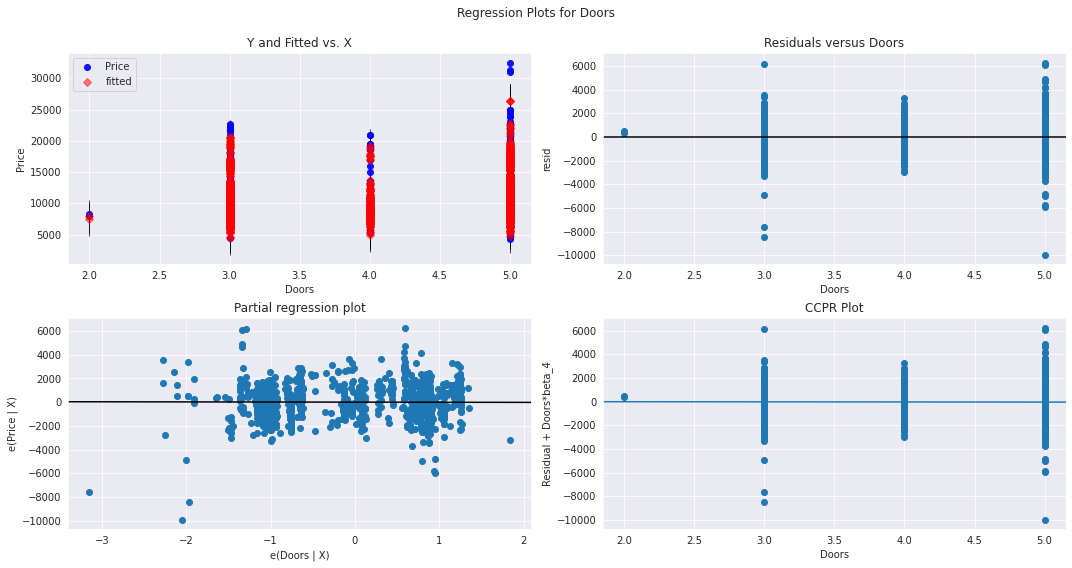

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

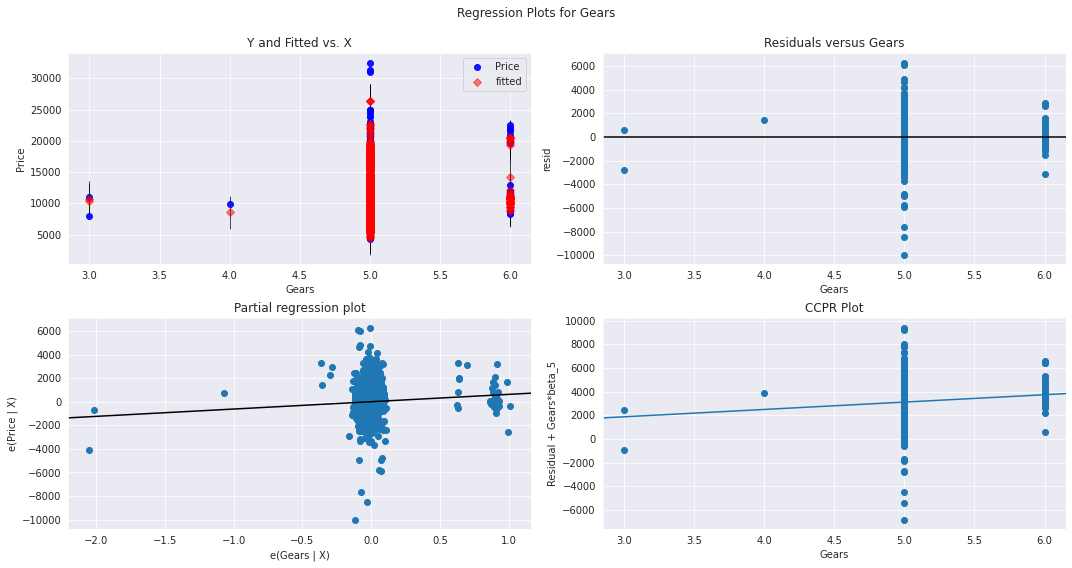

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

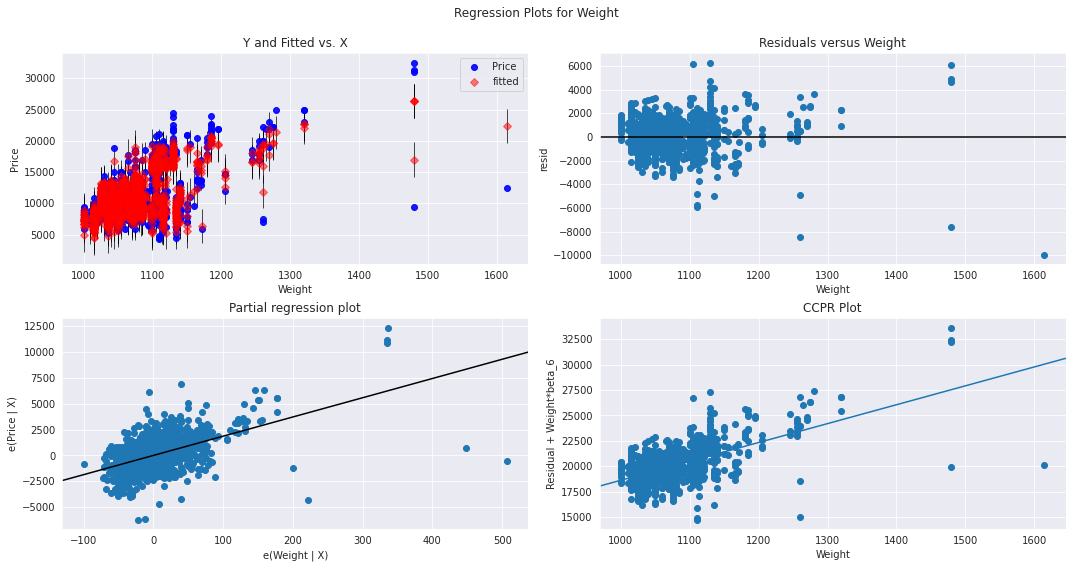

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

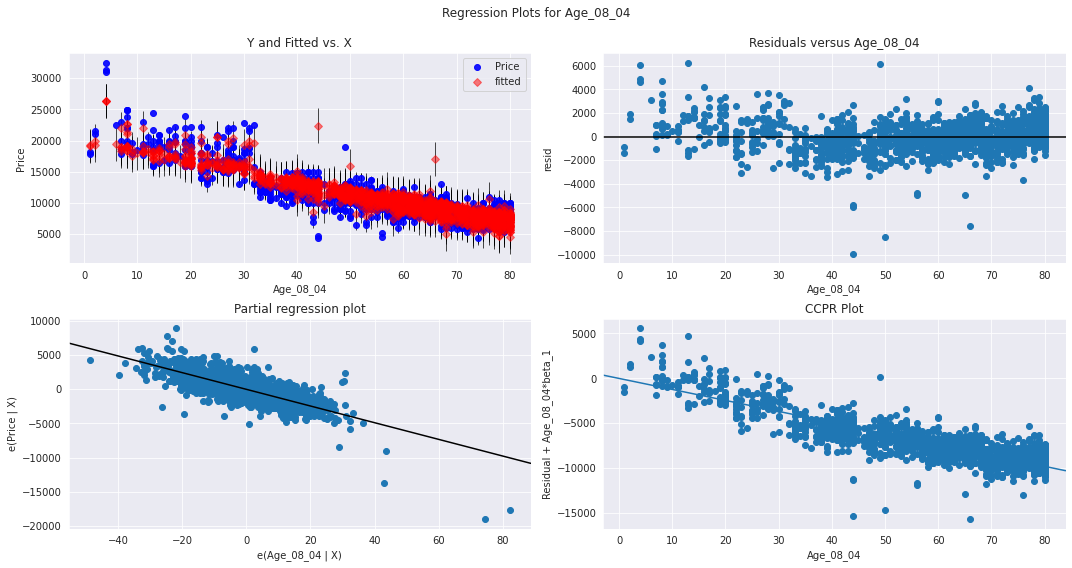

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


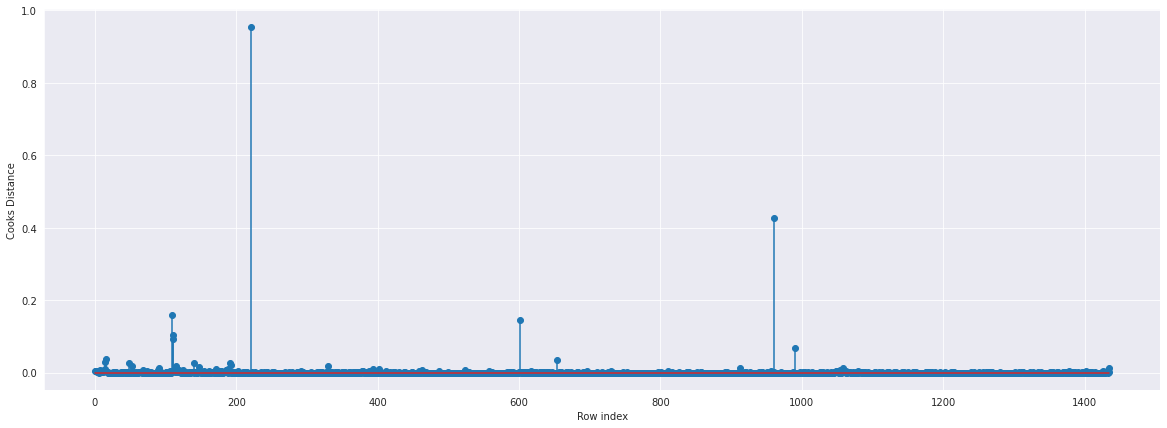

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.9553151438693979)

## High Influence points

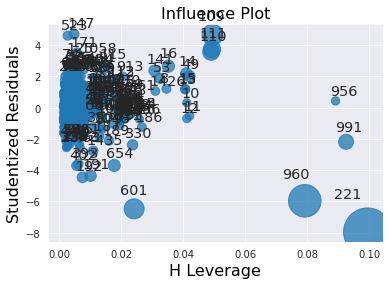

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [ ]:
leverage_cutoff

0.016713091922005572

#### From the above plot, it is evident that data point 216 are the influencers

In [ ]:
cars[cars.index.isin([216])]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
216,13500,33,75699,69,3,5,1105


In [ ]:
#See the differences 
cars.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


# Improving the model

In [ ]:
#Load the data
cars_new = pd.read_csv("/content/Toyoto_Corrola.csv")

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[216]],axis=0).reset_index()

In [ ]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [ ]:
car1.drop(['Id','Model','Cylinders'],inplace=True,axis=1)

In [ ]:
car1

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,5,1025
1431,10845,72,19000,86,3,5,1015
1432,8500,71,17016,86,3,5,1015
1433,7250,70,16916,86,3,5,1015


# Build Model

In [ ]:

final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data=car1).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8627565080505384, 24758.81656866423)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


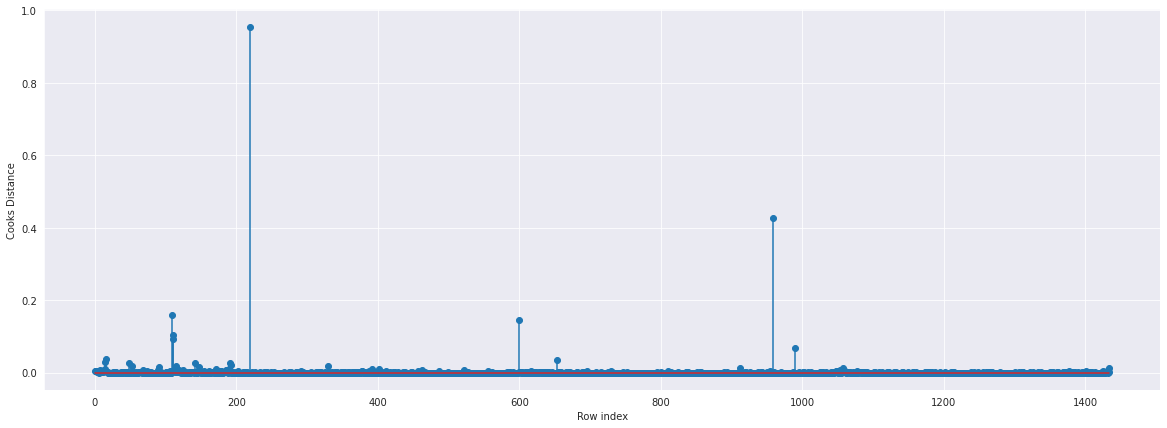

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 0.954581387003888)

In [ ]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[216]],axis=0)

In [ ]:
car2

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,5,1025
1431,10845,72,19000,86,3,5,1015
1432,8500,71,17016,86,3,5,1015
1433,7250,70,16916,86,3,5,1015


In [ ]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [ ]:
car4=car3.drop(['index'],axis=1)

In [ ]:
car4

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1429,7500,69,20544,86,3,5,1025
1430,10845,72,19000,86,3,5,1015
1431,8500,71,17016,86,3,5,1015
1432,7250,70,16916,86,3,5,1015


In [ ]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data=car1).fit()

In [ ]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 0.954581387003888)

In [ ]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

## Predicting for new data

In [ ]:
car4.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [ ]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':20,"KM":4950,"HP":90,"Doors":4,"Gears":4,"Weight":1168},index=[1])

In [ ]:
new_data

,Age_08_04,KM,HP,Doors,Gears,Weight
1,20,4950,90,4,4,1168


In [ ]:
final_ml_V.predict(new_data)

1    17208.086393
dtype: float64